# Criterios de Información

Juan Sosa PhD

Email: jcsosam@unal.edu.co

GitHub: https://github.com/jstats1702

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import gaussian_kde
from scipy.special import gammaln
from tabulate import tabulate

# Intoducción

Las medidas de **precisión predictiva**, conocidas como **criterios de información**, se definen en función de la **devianza** (*deviance*), que toma la forma:  
$$
-2\,\log p(\boldsymbol{y}\mid\hat{\boldsymbol{\theta}})\,.
$$

El factor $-2$ se incluye para alinear esta medida con el estadístico utilizado en la **prueba de razón de verosimilitudes** (*Likelihood Ratio Test*), definido como:  
$$
\lambda = -2\log\frac{\text{sup}_{\theta\in\Theta_0} L(\theta)}{\text{sup}_{\theta\in\Theta} L(\theta)},
$$
donde $L(\cdot)$ es la función de verosimilitud.

Sin embargo, seleccionar el modelo basado únicamente en la devianza más baja no es lo más adecuado. Es crucial realizar una **corrección por la complejidad del modelo**, considerando el **número de parámetros estimados** para evitar un ajuste excesivo (*overfitting*) y garantizar un equilibrio entre el ajuste y la capacidad predictiva del modelo.


# Criterios de información

Existen varios **métodos para estimar la precisión predictiva** sin necesidad de usar datos fuera de la muestra. Entre ellos destacan los siguientes **criterios de información**:

## Criterio de Información de la Devianza (DIC)

El **DIC** es una extensión Bayesiana del **Criterio de Información de Akaike (AIC)**, el cual está definido como:  
$$
\text{AIC} = -2\,\log p(\boldsymbol{y}\mid\hat{\boldsymbol{\theta}}_{\text{MLE}}) + 2k,
$$  
donde $k$ es el número de parámetros del modelo. 

En su versión Bayesiana, el DIC se define como:  
$$
\text{DIC} = -2\,\log p(\boldsymbol{y}\mid\hat{\boldsymbol{\theta}}_{\text{Bayes}}) + 2p_{\text{DIC}},
$$  
donde:

- $\hat{\boldsymbol{\theta}}_{\text{Bayes}} = \mathsf{E}(\boldsymbol{\theta}\mid\boldsymbol{y}) \approx \frac{1}{B}\sum_{b=1}^B \boldsymbol{\theta}^{(b)}$ es la **media posterior** de $\boldsymbol{\theta}$.
- $p_{\text{DIC}}$ es el **número efectivo de parámetros**, dado por:
$$
p_{\text{DIC}} = 2\left(\log p(\boldsymbol{y}\mid\hat{\boldsymbol{\theta}}_{\text{Bayes}}) - \mathsf{E}(\log p(\boldsymbol{y}\mid\boldsymbol{\theta}) \mid \boldsymbol{y})\right),
$$
lo cual se aproxima como:
$$
p_{\text{DIC}} \approx 2\left(\log p(\boldsymbol{y}\mid\hat{\boldsymbol{\theta}}_{\text{Bayes}}) - \frac{1}{B}\sum_{b=1}^B \log p(\boldsymbol{y}\mid\boldsymbol{\theta}^{(b)})\right).
$$

**Referencias:** 

- Spiegelhalter, D. J., Best, N. G., Carlin, B. P., & Van Der Linde, A. (2002). ***Bayesian measures of model complexity and fit.*** Journal of the Royal Statistical Society: Series B (Statistical Methodology), 64(4), 583-639.


## Criterio de Información de Watanabe-Akaike (WAIC)

El **WAIC** es un criterio completamente Bayesiano para medir la precisión predictiva y se define como:  
$$
\text{WAIC} = -2\,\text{lppd} + 2p_{\text{WAIC}},
$$  
donde:

- $\text{lppd}$ es la **densidad predictiva puntual logarítmica**:
$$
\text{lppd} = \sum_{i=1}^n \log \int_\Theta p(y_i \mid \boldsymbol{\theta}) p(\boldsymbol{\theta}\mid\boldsymbol{y}) \, \mathrm{d}\boldsymbol{\theta} \approx \sum_{i=1}^n \log\left(\frac{1}{B}\sum_{b=1}^B p(y_i \mid \boldsymbol{\theta}^{(b)})\right).
$$
- $p_{\text{WAIC}}$ es el **número efectivo de parámetros**, dado por:
$$
p_{\text{WAIC}} = 2\sum_{i=1}^n\left(\log \mathsf{E}(p(y_i\mid\boldsymbol{\theta}) \mid \boldsymbol{y}) - \mathsf{E}(\log p(y_i\mid\boldsymbol{\theta}) \mid \boldsymbol{y})\right),
$$
lo cual se aproxima como:
$$
p_{\text{WAIC}} \approx 2\sum_{i=1}^n\left(\log\left(\frac{1}{B}\sum_{b=1}^B p(y_i \mid \boldsymbol{\theta}^{(b)})\right) - \frac{1}{B}\sum_{b=1}^B \log p(y_i \mid \boldsymbol{\theta}^{(b)})\right).
$$

**Referencias:**

- Watanabe, S., & Opper, M. (2010). ***Asymptotic equivalence of Bayes cross validation and widely applicable information criterion in singular learning theory.*** Journal of Machine Learning Research, 11(12).
- Gelman, A., Hwang, J., & Vehtari, A. (2014). ***Understanding predictive information criteria for Bayesian models.*** Statistics and Computing, 24(6), 997-1016.

## Criterio de Información Bayesiano (BIC)

El **BIC** penaliza la complejidad del modelo en función del tamaño de la muestra, y se define como:
$$
\text{BIC} = -2\,\log p(\boldsymbol{y}\mid\hat{\boldsymbol{\theta}}_{\text{Bayes}}) + k\,\log(n),
$$  
donde:
- $k$ es el número de parámetros del modelo.
- $n$ es el tamaño de la muestra.

**Referencias:**

- Schwarz, G. (1978). ***Estimating the dimension of a model.*** The Annals of Statistics, 6(2), 461–464.


# Ejemplo: Puntajes de Matemáticas

La base de datos contiene información proveniente de una **muestra aleatoria simple** de los **estudiantes que presentaron la Prueba Saber 11 en el segundo semestre de 2023**.

La **prueba de matemáticas** está construida sobre una **escala de 0 a 100** (sin decimales), con un **puntaje promedio de 50** y una **desviación estándar de 10 puntos**.

El objetivo es **construir un modelo para el puntaje de matemáticas a nivel nacional**, utilizando como datos de entrenamiento los resultados del segundo semestre de 2023, con el propósito de **realizar inferencias sobre la población estudiantil tanto a nivel nacional como departamental**.

Por esta razón, se considera el **departamento de residencia del estudiante como variable de agrupamiento**.

Los datos son de acceso público y pueden consultarse en el siguiente [enlace](https://www.icfes.gov.co/data-icfes/).


## Estructura de los datos

- $y_{i,j}$:       puntaje de matemáticas del estudiante $i$ y en departamento $j$.
- $n_j\,\,$:       número de estudiantes en el departamento $j$.
- $\bar{y}_j\,\,$: promedio muestral del departamento $j$.
- $s^2_j\,\,$:     varianza muestral del departamento $j$.


## Tratamiento de datos


In [4]:
# Datos
dat = pd.read_csv("SB11_20232_muestra.txt", sep=";")
dat = dat.sort_values(by="ESTU_COD_RESIDE_MCPIO")

# Dimensiones
print(dat.shape)

# Distribución de frecuencias
print(dat["ESTU_DEPTO_RESIDE"].value_counts())

(5511, 83)
ESTU_DEPTO_RESIDE
BOGOTÁ             776
ANTIOQUIA          758
VALLE              401
CUNDINAMARCA       389
ATLANTICO          342
BOLIVAR            275
SANTANDER          274
CORDOBA            218
MAGDALENA          200
BOYACA             173
TOLIMA             170
CESAR              149
NORTE SANTANDER    147
NARIÑO             145
CAUCA              126
HUILA              126
RISARALDA          125
META               122
SUCRE              107
LA GUAJIRA         100
CALDAS              78
CHOCO               55
CASANARE            53
QUINDIO             45
CAQUETA             42
PUTUMAYO            38
ARAUCA              34
GUAVIARE            15
SAN ANDRES           9
AMAZONAS             8
GUAINIA              4
VICHADA              4
VAUPES               3
Name: count, dtype: int64


In [5]:
# m: número de grupos (departamentos)
m = dat["ESTU_DEPTO_RESIDE"].nunique()
print("m =", m)

# n: número de individuos (estudiantes)
n = dat["ESTU_DEPTO_RESIDE"].value_counts().sum()
print("n =", n)

m = 33
n = 5511


In [6]:
# Variable de interés
y = dat["PUNT_MATEMATICAS"].values  # vector numpy

# Preparar lista de listas Y y vector g
m = dat["ESTU_DEPTO_RESIDE"].nunique()
n = dat.shape[0]

Y = [None] * m
g = np.empty(n, dtype=int)

# Crear identificadores secuenciales y listas por grupo
departamentos_ordenados = sorted(dat["ESTU_COD_RESIDE_DEPTO"].unique())
for j in range(m):
    cod_j = departamentos_ordenados[j]
    idx = dat["ESTU_COD_RESIDE_DEPTO"] == cod_j
    g[idx.values] = j + 1  # índice desde 1 (como en R)
    Y[j] = y[idx.values]

# Tabla de estadísticas por departamento
estadisticos = (
    dat.groupby("ESTU_COD_RESIDE_DEPTO")
    .agg(
        codigo=("ESTU_COD_RESIDE_DEPTO", "first"),
        nombre=("ESTU_DEPTO_RESIDE", "first"),
        nj=("PUNT_MATEMATICAS", "count"),
        yb=("PUNT_MATEMATICAS", "mean"),
        s2=("PUNT_MATEMATICAS", "var")
    )
    .reset_index(drop=True)
)

In [7]:
# Mostrar las primeras 10 filas de la tabla de estadísticos
print(estadisticos.head(10))

   codigo     nombre   nj         yb          s2
0       5  ANTIOQUIA  758  49.935356  139.822764
1       8  ATLANTICO  342  50.096491  140.415882
2      11     BOGOTÁ  776  55.082474  143.848673
3      13    BOLIVAR  275  46.803636  176.632833
4      15     BOYACA  173  54.040462  150.004167
5      17     CALDAS   78  52.217949  118.588245
6      18    CAQUETA   42  50.071429  167.043554
7      19      CAUCA  126  48.023810  163.927429
8      20      CESAR  149  50.543624  136.560584
9      23    CORDOBA  218  49.096330  181.728005


In [8]:
# Tamaños de muestra
nj = estadisticos["nj"].values

# Estadísticos suficientes
yb = estadisticos["yb"].values
s2 = estadisticos["s2"].values

## Modelamiento

- $\textsf{M}_1$: Modelo jerárquico Normal con medias específicas.
- $\textsf{M}_2$: Modelo jerárquico Normal con medias y varianzas específicas.

In [10]:
def MCMC1(B, y, nj, yb, s2, mu0, g20, eta0, t20, nu0, s20):
    # Validación de entradas
    y = np.asarray(y)
    yb = np.asarray(yb)
    s2 = np.asarray(s2)
    nj = np.asarray(nj)

    assert len(yb) == len(s2) == len(nj), "yb, s2 y nj deben tener la misma longitud"
    assert np.sum(nj) == len(y), "La suma de nj debe coincidir con la longitud de y"

    ncat = B // 10
    n = np.sum(nj)
    m = len(nj)

    # Inicialización
    theta = yb.copy()
    sig2 = np.mean(s2)
    mu = np.mean(theta)
    tau2 = np.var(theta, ddof=1)

    # Determinar tamaño correcto de la fila
    n_params = len(theta) + 4
    THETA = np.empty((B, n_params))
    THETA[:] = np.nan

    for b in range(B):
        # Actualizar theta_j
        v_theta = 1 / (1 / tau2 + nj / sig2)
        m_theta = v_theta * (mu / tau2 + nj * yb / sig2)
        theta = np.random.normal(loc=m_theta, scale=np.sqrt(v_theta))

        # Actualizar sigma^2
        a_sig2 = 0.5 * (nu0 + n)
        b_sig2 = 0.5 * (nu0 * s20 + np.sum((nj - 1) * s2 + nj * (yb - theta)**2))
        sig2 = 1 / np.random.gamma(shape=a_sig2, scale=1 / b_sig2)

        # Actualizar mu
        v_mu = 1 / (1 / g20 + m / tau2)
        m_mu = v_mu * (mu0 / g20 + m * np.mean(theta) / tau2)
        mu = np.random.normal(loc=m_mu, scale=np.sqrt(v_mu))

        # Actualizar tau^2
        a_tau2 = 0.5 * (eta0 + m)
        b_tau2 = 0.5 * (eta0 * t20 + (m - 1) * np.var(theta, ddof=1) + m * (np.mean(theta) - mu)**2)
        tau2 = 1 / np.random.gamma(shape=a_tau2, scale=1 / b_tau2)

        # Log-verosimilitud
        rep_theta = np.repeat(theta, nj)
        ll = np.sum(norm.logpdf(y, loc=rep_theta, scale=np.sqrt(sig2)))

        # Concatenar todos los valores muestreados
        fila = np.concatenate([theta, [sig2, mu, tau2, ll]])
        THETA[b, :] = fila  # esta asignación ahora siempre tiene la dimensión correcta

        if (b + 1) % ncat == 0:
            print(f"{int(100 * (b + 1) / B)}% completado ...")

    colnames = [f"theta{j}" for j in range(len(theta))] + ["sig2", "mu", "tau2", "ll"]

    return {"THETA": pd.DataFrame(THETA, columns=colnames)}

In [11]:
def MCMC2(B, y, nj, yb, s2, mu0, g20, eta0, t20, lam0, al0, be0, nus0):
    y = np.asarray(y)
    nj = np.asarray(nj)
    yb = np.asarray(yb)
    s2 = np.asarray(s2)
    nus0 = np.asarray(nus0)

    ncat = B // 10
    n = np.sum(nj)
    m = len(nj)

    THETA = np.empty((B, 2 * m + 5))
    THETA[:] = np.nan

    theta = yb.copy()
    sig2 = s2.copy()
    mu = np.mean(theta)
    tau2 = np.var(theta, ddof=1)
    nu = 1
    ups2 = 100.0

    for b in range(B):
        # Actualizar theta_j
        v_theta = 1 / (1 / tau2 + nj / sig2)
        m_theta = v_theta * (mu / tau2 + nj * yb / sig2)
        theta = np.random.normal(loc=m_theta, scale=np.sqrt(v_theta))

        # Actualizar sigma_j^2
        a_sig2 = 0.5 * (nu + nj)
        b_sig2 = 0.5 * (nu * ups2 + (nj - 1) * s2 + nj * (yb - theta) ** 2)
        sig2 = 1 / np.random.gamma(shape=a_sig2, scale=1 / b_sig2)

        # Actualizar mu
        v_mu = 1 / (1 / g20 + m / tau2)
        m_mu = v_mu * (mu0 / g20 + m * np.mean(theta) / tau2)
        mu = np.random.normal(loc=m_mu, scale=np.sqrt(v_mu))

        # Actualizar tau^2
        a_tau2 = 0.5 * (eta0 + m)
        b_tau2 = 0.5 * (eta0 * t20 + (m - 1) * np.var(theta, ddof=1) + m * (np.mean(theta) - mu) ** 2)
        tau2 = 1 / np.random.gamma(shape=a_tau2, scale=1 / b_tau2)

        # Actualizar nu
        term1 = 0.5 * m * nus0 * np.log(0.5 * nus0 * ups2)
        term2 = m * gammaln(0.5 * nus0)
        term3 = 0.5 * nus0 * np.sum(np.log(sig2))
        term4 = nus0 * (lam0 + 0.5 * ups2 * np.sum(1 / sig2))
        lpnu = term1 - term2 - term3 - term4

        prob = np.exp(lpnu - np.max(lpnu))
        prob = prob / np.sum(prob)
        nu = np.random.choice(nus0, p=prob)

        # Actualizar ups2
        a_ups2 = al0 + 0.5 * m * nu
        b_ups2 = be0 + 0.5 * nu * np.sum(1 / sig2)
        ups2 = np.random.gamma(shape=a_ups2, scale=1 / b_ups2)

        # Log-verosimilitud
        rep_theta = np.repeat(theta, nj)
        rep_sig2 = np.repeat(sig2, nj)
        ll = np.sum(norm.logpdf(y, loc=rep_theta, scale=np.sqrt(rep_sig2)))

        THETA[b, :] = np.concatenate([theta, sig2, [mu, tau2, nu, ups2, ll]])

        if (b + 1) % ncat == 0:
            print(f"{int(100 * (b + 1) / B)}% completado ...")

    colnames = [f"theta{j+1}" for j in range(m)] + [f"sig2{j+1}" for j in range(m)] + ["mu", "tau2", "nu", "ups2", "ll"]
    return {"THETA": pd.DataFrame(THETA, columns=colnames)}

**Ajuste del modelo 1:**

In [13]:
# Hiperparámetros
mu0  = 50
g20  = 10**2

eta0 = 1
t20  = 10**2

nu0  = 1
s20  = 10**2

# Ajuste del modelo
np.random.seed(123)
chain1 = MCMC1(B=10000, y=y, nj=nj, yb=yb, s2=s2, mu0=mu0, g20=g20, eta0=eta0, t20=t20, nu0=nu0, s20=s20)

10% completado ...
20% completado ...
30% completado ...
40% completado ...
50% completado ...
60% completado ...
70% completado ...
80% completado ...
90% completado ...
100% completado ...


**Ajuste del modelo 2**

In [15]:
# Hiperparámetros
mu0  = 50
g20  = 10**2

eta0 = 1
t20  = 10**2

lam0 = 1

al0  = 1
be0  = 1 / 10**2

nus0 = np.arange(1, 51)  # rango de 1 a 50 (inclusive del 1, exclusivo del 51)

# Ajuste del modelo 2
np.random.seed(123)
chain2 = MCMC2(B=10000, y=y, nj=nj, yb=yb, s2=s2, mu0=mu0, g20=g20, eta0=eta0, t20=t20, lam0=lam0, al0=al0, be0=be0, nus0=nus0)

10% completado ...
20% completado ...
30% completado ...
40% completado ...
50% completado ...
60% completado ...
70% completado ...
80% completado ...
90% completado ...
100% completado ...


## Log-verosimilitud

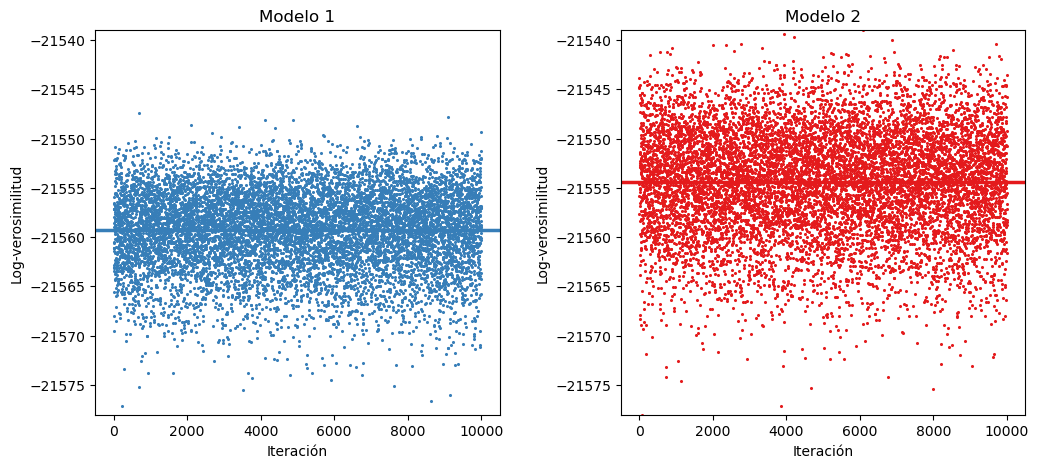

In [17]:
# Paleta de colores equivalente a RColorBrewer::brewer.pal(9, "Set1")[1:9]
col = sns.color_palette("Set1", 9)

# Extraer log-verosimilitudes
ll1 = chain1["THETA"]["ll"]
ll2 = chain2["THETA"]["ll"]

# Rango común para el eje y
yrange = (min(ll1.min(), ll2.min()), max(ll1.max(), ll2.max()))

# Configurar los gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.3)

# Modelo 1
axs[0].scatter(range(len(ll1)), ll1, color=col[1], s=1.5)
axs[0].axhline(np.mean(ll1), color=col[1], linewidth=2.5)
axs[0].set_ylim(yrange)
axs[0].set_xlabel("Iteración")
axs[0].set_ylabel("Log-verosimilitud")
axs[0].set_title("Modelo 1")

# Modelo 2
axs[1].scatter(range(len(ll2)), ll2, color=col[0], s=1.5)
axs[1].axhline(np.mean(ll2), color=col[0], linewidth=2.5)
axs[1].set_ylim(yrange)
axs[1].set_xlabel("Iteración")
axs[1].set_ylabel("Log-verosimilitud")
axs[1].set_title("Modelo 2")

plt.show()

## Criterios de información

In [19]:
# DIC: Modelo 1
LL1 = chain1["THETA"]["ll"]

theta_hat = np.mean(chain1["THETA"].iloc[:, :m], axis=0)
sigma2_hat = np.mean(chain1["THETA"]["sig2"])

theta_rep = np.repeat(theta_hat, nj)
lpy_m1 = np.sum(norm.logpdf(y, loc=theta_rep, scale=np.sqrt(sigma2_hat)))

pDIC_m1 = 2 * (lpy_m1 - np.mean(LL1))
dic_m1 = -2 * lpy_m1 + 2 * pDIC_m1

print("DIC Modelo 1:", round(dic_m1, 1))

DIC Modelo 1: 43147.1


In [20]:
# DIC: Modelo 2
LL2 = chain2["THETA"]["ll"]

theta_hat = np.mean(chain2["THETA"].iloc[:, :m], axis=0)
sigma2_hat = np.mean(chain2["THETA"].iloc[:, m:2*m], axis=0)

theta_rep = np.repeat(theta_hat, nj)
sigma2_rep = np.repeat(sigma2_hat, nj)
lpy_m2 = np.sum(norm.logpdf(y, loc=theta_rep, scale=np.sqrt(sigma2_rep)))

pDIC_m2 = 2 * (lpy_m2 - np.mean(LL2))
dic_m2 = -2 * lpy_m2 + 2 * pDIC_m2

print("DIC Modelo 2:", round(dic_m2, 1))

DIC Modelo 2: 43161.4


In [21]:
# WAIC: Modelo 1
lppd_m1 = 0
pWAIC_m1 = 0

# Para cada observación
for i in range(n):
    # Grupo correspondiente a la observación i
    g_i = g[i] - 1  # índice de grupo: índices en base 0

    # Densidades evaluadas en cada iteración MCMC
    mu_i = chain1["THETA"].iloc[:, g_i]  # medias por iteración
    sig2_i = chain1["THETA"]["sig2"]     # varianza común por iteración

    tmp1 = norm.pdf(y[i], loc=mu_i, scale=np.sqrt(sig2_i))
    lppd_m1 += np.log(np.mean(tmp1))

    tmp2 = norm.logpdf(y[i], loc=mu_i, scale=np.sqrt(sig2_i))
    pWAIC_m1 += 2 * (np.log(np.mean(tmp1)) - np.mean(tmp2))

# WAIC final
waic_m1 = -2 * lppd_m1 + 2 * pWAIC_m1

print("WAIC Modelo 1:", round(waic_m1, 1))

WAIC Modelo 1: 43146.7


In [22]:
# Inicializar acumuladores
lppd_m2 = 0
pWAIC_m2 = 0

# Calcular WAIC
for i in range(n):
    g_i = g[i] - 1  # índice de grupo: índices en base 0

    # Media y varianza específicas por grupo y por iteración
    mu_i = chain2["THETA"].iloc[:, g_i]              # columna g_i: theta del grupo
    sig2_i = chain2["THETA"].iloc[:, m + g_i]        # columna m + g_i: sigma^2 del grupo

    # Evaluación de la densidad
    tmp1 = norm.pdf(y[i], loc=mu_i, scale=np.sqrt(sig2_i))
    lppd_m2 += np.log(np.mean(tmp1))

    tmp2 = norm.logpdf(y[i], loc=mu_i, scale=np.sqrt(sig2_i))
    pWAIC_m2 += 2 * (np.log(np.mean(tmp1)) - np.mean(tmp2))

# WAIC final
waic_m2 = -2 * lppd_m2 + 2 * pWAIC_m2

print("WAIC Modelo 2:", round(waic_m2, 1))

WAIC Modelo 2: 43157.2


In [23]:
# Construcción de la tabla
tab = np.array([
    [lpy_m1,   lpy_m2],
    [pDIC_m1,  pDIC_m2],
    [dic_m1,   dic_m2],
    [lppd_m1,  lppd_m2],
    [pWAIC_m1, pWAIC_m2],
    [waic_m1,  waic_m2]
])

# Crear DataFrame con nombres de filas y columnas
tabla = pd.DataFrame(
    tab,
    index=["lp", "pDIC", "DIC", "lppd", "pWAIC", "WAIC"],
    columns=["Modelo 1", "Modelo 2"]
)

# Redondear a 2 decimales y mostrar
print(tabla.round(2))


       Modelo 1  Modelo 2
lp    -21545.06 -21528.07
pDIC      28.48     52.63
DIC    43147.08  43161.40
lppd  -21545.26 -21530.15
pWAIC     28.08     48.47
WAIC   43146.67  43157.24


# Ejercicios

- Considere el modelo normal jerárquico con medias específicas por grupo y varianza común. Utilizando los datos de la prueba Saber 11 del segundo semestre de 2023:

    - Obtenga la distribución predictiva posterior para una nueva observación de en un grupo observado de su interés (e.g., Bogotá).
    - Obtenga la distribución predictiva posterior para una nueva observación de en un grupo no observado (i.e., un departamento hipotético del que no se tienen observaciones).
    - Evalúe la bondad de ajuste del modelo mediante un conjunto de estadísticos de prueba relevantes para un grupo observado de su interés (e.g., Bogotá), utilizando simulaciones de la distribución predictiva posterior.

- Considere el modelo $y_i \mid \theta, \sigma^2 \overset{\text{ind}}{\sim} \textsf{t}_\kappa(\theta_j, \sigma^2)$, para $i = 1, \dots, n$, donde $\kappa \sim \textsf{U}\{1, 2, \dots, \nu_0\}$, con $\nu_0$ como hiperparámetro. El resto del modelo se especifica de forma análoga al modelo normal jerárquico con medias específicas por grupo y varianza común.

    - Reescriba la distribución muestral del modelo utilizando variables auxiliares, mediante la representación de la distribución t como una composición de una distribución Normal con una distribución Gamma Inversa (ver los ejercicios del "Muestreador de Gibbs").
    - Derive las distribuciones condicionales completas de todos los parámetros del modelo.
    - Ajuste el modelo a los datos de la prueba Saber 11 del segundo semestre de 2023.
    - Identifique los valores atípicos (*outliers*) utilizando las variables auxiliares.
    - Realice toda la inferencia que se llevó a cabo en el caso del modelo normal jerárquico con medias específicas por grupo y varianza común.
    - Interprete y compare los resultados obtenidos con los del modelo normal jerárquico.
    - Calcule todos los criterios de información y compare los resultados con los modelos normales.

- Repetir el ejercicio anterior para el modelo $y_i \mid \theta, \sigma^2 \overset{\text{ind}}{\sim} \textsf{t}_\kappa(\theta_j, \sigma^2_j)$, para $i = 1, \dots, n$.

# Referencias

Hoff, P. D. (2009). *A First Course in Bayesian Statistical Methods*. Springer New York.

Gelman, A., Carlin, J. B., Stern, H. S., Dunson, D. B., Vehtari, A., & Rubin, D. B. (2013). *Bayesian Data Analysis* (3rd ed.). Chapman & Hall/CRC.